In [83]:
!pip install matplotlib deap
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random
from deap import tools,base,creator,algorithms

In [95]:
# TODO: Task 2 - Define the number of locations and vehicles

num_locations = 10 # Define the number of locations (eg 10)

locations = [(random.randint(0, 100), random.randint(0, 100)) for _ in range(num_locations)] # Create a list of tuples representing location coordinates -
            # try to use a random number generator
            # (x, y) could be between 0 and 100

depot = (25,25)# Define the coordinates for the depot

num_vehicles = 2# Define the number of vehicles - (eg 3)

In [96]:
# TASK 3 - Genetic Algorithm Setup
       # - Figure out how to represent an individual OR encode an individual

creator.create("FitnessMin",base.Fitness, weights=(-1.0,) )
creator.create("Individual",list,fitness=creator.FitnessMin )

In [97]:
#TASK 4 - Starting with the toolbox and tools

toolbox = base.Toolbox()
toolbox.register("indices", random.sample, range(num_locations), num_locations)
toolbox.register("individual", tools.initIterate ,creator.Individual, toolbox.indices)#finish defining how to build an individual)
toolbox.register("population", tools.initRepeat, list, toolbox.individual) #finish defining how to build an population)

In [98]:
def evalVRP(individual):
    total_distance = 0
    distances = []  # Track distance traveled by each vehicle for balance calculation
    # Split the list of locations among vehicles, ensuring each starts and ends at the depot
    for i in range(num_vehicles):

        vehicle_route = [depot] + [locations[individual[j]] for j in range(i, len(individual), num_vehicles)] + [depot]

        vehicle_distance = 0
        for j in range(len(vehicle_route) - 1):
            vehicle_distance += np.linalg.norm(np.array(vehicle_route[j+1]) - np.array(vehicle_route[j]))

        total_distance += vehicle_distance
        distances.append(vehicle_distance)

    balance_penalty = np.std(distances)  # Use standard deviation of distances as a penalty for imbalance among vehicles
    return (total_distance+0.1*balance_penalty,)

toolbox.register("evaluate", evalVRP)

In [99]:
toolbox.register("select", tools.selTournament, tournsize=3)
toolbox.register("mate", tools.cxOrdered)
toolbox.register("mutate", tools.mutShuffleIndexes, indpb=0.5)

In [100]:
# Plotting Function
def plot_routes(individual, title="Routes"):
    plt.figure()
    # Plot locations as blue dots and the depot as a red square
    for (x, y) in locations:
        plt.plot(x, y, 'ko')
    plt.plot(depot[0], depot[1], 'rs')

    # Draw routes for each vehicle
    for i in range(num_vehicles):
        vehicle_route = [depot] + [locations[individual[j]] for j in range(i, len(individual), num_vehicles)] + [depot]
        plt.plot(*zip(*vehicle_route), '-', 'rs')

    plt.title(title)
    plt.xlabel('X Coordinate')
    plt.ylabel('Y Coordinate')
    plt.show()



gen	nevals	avg    	min    
0  	300   	631.863	471.166
1  	232   	604.179	443.592
2  	231   	586.99 	443.592
3  	228   	583.326	436.352
4  	226   	576.482	447.087
5  	233   	566.38 	423.529
6  	237   	570.677	423.529
7  	219   	560.953	423.529
8  	234   	567.127	428.659
9  	219   	567.967	428.659
10 	237   	564.765	434.371
11 	219   	557.33 	423.529
12 	239   	550.706	421.171
13 	240   	553.291	423.529
14 	238   	540.284	421.954
15 	220   	529.492	421.954
16 	229   	531.507	416.819
17 	229   	523.339	416.819
18 	235   	516.288	416.819
19 	215   	506.94 	416.819
20 	228   	508.085	416.819
21 	233   	508.064	416.089
22 	241   	500.893	416.089
23 	220   	502.184	416.819
24 	224   	504.892	415.415
25 	218   	486.882	415.415
26 	231   	469.014	415.415
27 	224   	455.655	415.415
28 	237   	457.734	415.415
29 	223   	454.781	415.415
30 	221   	460.359	415.415


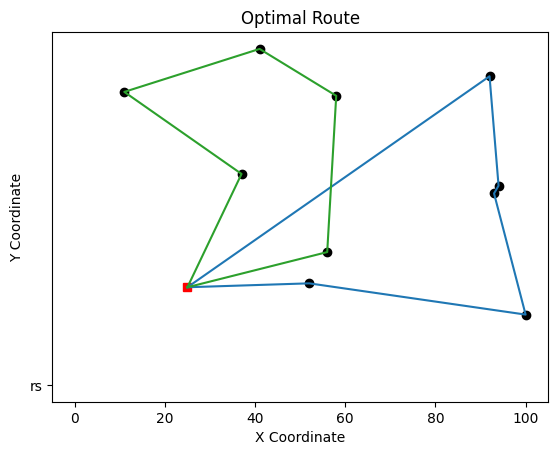

Best individual found is:  [5, 2, 3, 9, 6, 0, 7, 8, 1, 4]
Fitness of the best individual:  (415.41496220243647,)


In [101]:
# Running the Genetic Algorithm
def main():
    random.seed(1)
    pop = toolbox.population(n=300)
    hof = tools.HallOfFame(1)

    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("avg", np.mean)
    stats.register("min", np.min)

    algorithms.eaSimple(pop, toolbox, 0.7, 0.2, 30, stats=stats, halloffame=hof)

    #Refer eaSimple here - https://deap.readthedocs.io/en/master/api/algo.html
    plot_routes(hof[0], "Optimal Route")
    return pop, stats, hof

if __name__ == "__main__":
    # TODO: Task 9 - Call the main function, run the algorithm and print the results
    pop, stats, hof = main()
    print("Best individual found is: ", hof[0])
    print("Fitness of the best individual: ", hof[0].fitness.values)
